In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import statsmodels.api as sm
from scipy import stats
from sklearn.pipeline import Pipeline
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.covariance import EllipticEnvelope
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
warnings.filterwarnings('ignore')
train = pd.read_csv("SpeedDatingData.csv", encoding="ISO-8859-1") 
train.head() #yuck lots of objects and floats


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [2]:
# combining columns to make a column that has more rows in it
dating_1 = train.iloc[:, 11:30]
dating_2 = train.iloc[:, 30:35]
dating_3 = train.iloc[:, 39:45]
dating_4 = train.iloc[:, 45:68]
dating_5 = train.iloc[:, 69:79]
dating_6 = train.iloc[:, 87:91]
dating_7 = train.iloc[:, 97:102]
dating_8 = train.iloc[:, 104:107]
#combining everything to make one big column
date = pd.concat([train.iloc[:, 0],train.iloc[:, 2],dating_1,dating_2,dating_3,dating_4,dating_5,
                  dating_6,dating_7,dating_8], axis=1)
speed = date.dropna() #dropping missing values
speed.head()

,iid,gender,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,...,fun3_1,intel3_1,dec,attr,sinc,intel,fun,like,prob,met
1846,132,0,137.0,0,0.16,0,26.0,4.0,17.39,17.39,...,10.0,9.0,0,7.0,9.0,7.0,9.0,8.0,7.0,1.0
1847,132,0,138.0,0,0.34,1,32.0,2.0,20.00,20.00,...,10.0,9.0,0,8.0,8.0,8.0,8.0,8.0,5.0,2.0
1849,132,0,140.0,1,0.13,1,29.0,2.0,18.60,16.28,...,10.0,9.0,1,8.0,9.0,9.0,9.0,9.0,7.0,1.0
1850,132,0,141.0,0,0.05,0,28.0,3.0,20.83,20.83,...,10.0,9.0,0,5.0,8.0,8.0,8.0,7.0,7.0,1.0
1856,134,0,137.0,1,-0.10,0,26.0,4.0,17.39,17.39,...,8.0,8.0,1,8.0,9.0,7.0,9.0,9.0,6.0,2.0


In [3]:

women = speed[speed.gender == 0]
men = speed[speed.gender == 1]

In [4]:
X_ols = speed[['attr','sinc','intel','fun','like','int_corr','pf_o_sha','race']]
y_ols = speed.dec
traits = sm.OLS(y_ols, X_ols)
results_traits = traits.fit()
results_traits.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    dec   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     393.0
Date:                Sun, 03 Nov 2019   Prob (F-statistic):               0.00
Time:                        16:41:08   Log-Likelihood:                -1290.8
No. Observations:                2394   AIC:                             2598.
Df Residuals:                    2386   BIC:                             2644.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
attr           0.0580      0.006     10.164      0.000       0.047       0.069
sinc          -0.0154      0.007     -2.335      0.020      -0.028      -0.002
intel         -0.0484      0.007     -7.055      0.000      -0.062      -0.035
fun            0.0174      0.006      2.806      0.005       0.005       0.029
like           0.0857      0.007     11.980      0.000       0.072       0.100
int_corr      -0.0188      0.029     -0.647      0.518      -0.076       0.038
pf_o_sha      -0.0054      0.001     -3.939      0.000      -0.008      -0.003
race          -0.0143      0.006     -2.296      0.022      -0.027      -0.002
==============================================================================
Omnibus:                     3403.202   Durbin-Watson:                   1.594
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.757
Skew:                           0.157   Prob(JB):                     6.15e-37
Kurtosis:                       1.746   Cond. No.                         68.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [158]:
#full model # 410
X=women[['int_corr' , 'samerace' , 'age_o' , 'race_o' , 'pf_o_att' ,'pf_o_sin','pf_o_int','pf_o_fun','pf_o_amb','pf_o_sha','attr_o','sinc_o','intel_o','fun_o','amb_o','met_o','age' , 'race','imprace','imprelig','goal','date','go_out','sports','tvsports','exercise', 'dining','museums','art','hiking','gaming','clubbing','reading','tv','theater','movies','concerts','music','shopping','yoga','attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1','attr3_1','sinc3_1','fun3_1','intel3_1', 'dec' ,'attr','sinc','intel','fun' ,'met']]
y=women['dec_o']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10, stratify=y)

In [159]:
# logistic regression classification model
model = LogisticRegression(random_state=43)
lrc = model.fit(X_train, y_train)
predict_train_lrc = lrc.predict(X_train)
predict_test_lrc = lrc.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_lrc))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_lrc))

Training Accuracy: 0.7627551020408163
Validation Accuracy: 0.7050847457627119


In [195]:
#selected model 
X=women[['int_corr' ,'pf_o_att', 'pf_o_sin', 'pf_o_int' ,'pf_o_fun', 'pf_o_sha' ,'attr_o', 'intel_o', 'fun_o', 'amb_o' ,'shar_o', 'met_o', 'race', 'goal', 'go_out', 'sports', 'exercise', 'clubbing', 'reading', 'movies' ,'concerts' , 'attr' ,'sinc'  ,'met']]
y=women['dec_o']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10, stratify=y)

In [196]:
# logistic regression classification model
model = LogisticRegression(random_state=43)
lrc = model.fit(X_train, y_train)
predict_train_lrc = lrc.predict(X_train)
predict_test_lrc = lrc.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_lrc))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_lrc))

Training Accuracy: 0.7397959183673469
Validation Accuracy: 0.735593220338983


In [223]:
#full model # 410
X=women[['int_corr' , 'samerace' , 'age_o' , 'race_o' , 'pf_o_att' ,'pf_o_sin','pf_o_int','pf_o_fun','pf_o_amb','pf_o_sha','attr_o','sinc_o','intel_o','fun_o','amb_o','met_o','age' , 'race','imprace','imprelig','goal','date','go_out','sports','tvsports','exercise', 'dining','museums','art','hiking','gaming','clubbing','reading','tv','theater','movies','concerts','music','shopping','yoga','attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1','attr3_1','sinc3_1','fun3_1','intel3_1', 'dec' ,'attr','sinc','intel','fun' ,'met']]
y=women['dec_o']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10, stratify=y)

In [228]:
#RF
model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth = 9 , max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=410, n_jobs=1,
            oob_score=False, random_state=43, verbose=0,
            warm_start=False)
rf_model = model.fit(X_train, y_train)
predict_train_rf = rf_model.predict(X_train)
predict_test_rf = rf_model.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_rf))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_rf))

Training Accuracy: 0.9770408163265306
Validation Accuracy: 0.7932203389830509


In [229]:
list(zip(X_train, model.feature_importances_))

[('int_corr', 0.02906873479742661),
 ('samerace', 0.005834740813576151),
 ('age_o', 0.027879959525163374),
 ('race_o', 0.01283403253945187),
 ('pf_o_att', 0.03138271070034396),
 ('pf_o_sin', 0.027825504300405653),
 ('pf_o_int', 0.0292669904745193),
 ('pf_o_fun', 0.03368803435412072),
 ('pf_o_amb', 0.023266308822808862),
 ('pf_o_sha', 0.028984445874225464),
 ('attr_o', 0.14955435954160076),
 ('sinc_o', 0.025323640805980006),
 ('intel_o', 0.022925602091755953),
 ('fun_o', 0.09161537469086702),
 ('amb_o', 0.02638459587870418),
 ('met_o', 0.0019071330649702675),
 ('age', 0.013386031306220278),
 ('race', 0.0069340645527906156),
 ('imprace', 0.010077570035225154),
 ('imprelig', 0.012272463788663967),
 ('goal', 0.008991373726487029),
 ('date', 0.008345353530440566),
 ('go_out', 0.007502599887582212),
 ('sports', 0.011233549772832564),
 ('tvsports', 0.011128529331402095),
 ('exercise', 0.015213822194901264),
 ('dining', 0.0075208126462473915),
 ('museums', 0.008964577778726253),
 ('art', 0.009

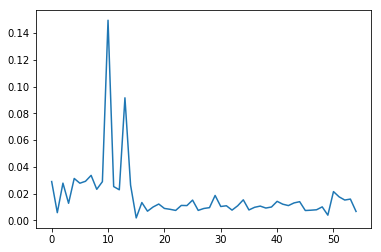

In [230]:
plt.plot(model.feature_importances_)

In [231]:
# xgboost model
model = GradientBoostingClassifier( max_depth = 3 ,n_estimators=450,learning_rate = 0.1,random_state=43)
xgb_model = model.fit(X_train, y_train)
predict_train_xgb = xgb_model.predict(X_train)
predict_test_xgb = xgb_model.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_xgb))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_xgb))

Training Accuracy: 0.9991496598639455
Validation Accuracy: 0.823728813559322


In [232]:
list(zip(X_train, model.feature_importances_))

[('int_corr', 0.03238066905579222),
 ('samerace', 0.00462639949969824),
 ('age_o', 0.03466682780685064),
 ('race_o', 0.031116095167861738),
 ('pf_o_att', 0.04776511189033239),
 ('pf_o_sin', 0.05095230379860967),
 ('pf_o_int', 0.05003812580732832),
 ('pf_o_fun', 0.04025196190062562),
 ('pf_o_amb', 0.028906879554259492),
 ('pf_o_sha', 0.04140947959585565),
 ('attr_o', 0.26647381704889245),
 ('sinc_o', 0.014717972920749327),
 ('intel_o', 0.019671562637699366),
 ('fun_o', 0.0929360009958484),
 ('amb_o', 0.008027323386644414),
 ('met_o', 0.0034648700986651742),
 ('age', 0.007783926761386303),
 ('race', 0.006011561493911393),
 ('imprace', 0.005158017664535263),
 ('imprelig', 0.010039840493353089),
 ('goal', 0.008264939210238862),
 ('date', 0.004524652133733377),
 ('go_out', 0.0021347795288953063),
 ('sports', 0.0036488966180479726),
 ('tvsports', 0.008080282274251362),
 ('exercise', 0.005430578822568714),
 ('dining', 0.00396961811994548),
 ('museums', 0.0027069308565804053),
 ('art', 0.00196

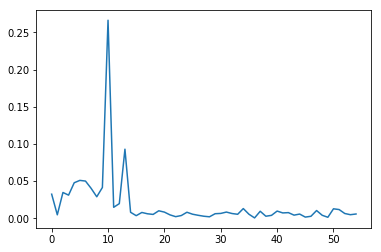

In [233]:
plt.plot(model.feature_importances_)

In [234]:
#no interaction # 20
X=women[['int_corr' , 'samerace' , 'age_o' , 'race_o' , 'pf_o_att' ,'pf_o_sin','pf_o_int','pf_o_fun','pf_o_amb','pf_o_sha','met_o','age' , 'race','imprace','imprelig','goal','date','go_out','sports','tvsports','exercise', 'dining','museums','art','hiking','gaming','clubbing','reading','tv','theater','movies','concerts','music','shopping','yoga','attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1','attr3_1','sinc3_1','fun3_1','intel3_1' ,'met' ]]
y=women['dec_o']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10, stratify=y)

In [235]:
# logistic regression classification model
model = LogisticRegression(random_state=43)
lrc = model.fit(X_train, y_train)
predict_train_lrc = lrc.predict(X_train)
predict_test_lrc = lrc.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_lrc))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_lrc))

Training Accuracy: 0.6454081632653061
Validation Accuracy: 0.5932203389830508


In [236]:
#no interaction selected # 20
X=women[['int_corr' , 'samerace' , 'age_o' , 'race_o' ,'pf_o_int','pf_o_fun','pf_o_sha','met_o','age' , 'race','imprelig','goal','date','sports','exercise', 'museums','gaming','clubbing','reading','theater','movies','concerts','music','yoga','amb1_1','attr3_1','intel3_1' ,'met']]
y=women['dec_o']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10, stratify=y)

In [237]:
# logistic regression classification model
model = LogisticRegression(random_state=43)
lrc = model.fit(X_train, y_train)
predict_train_lrc = lrc.predict(X_train)
predict_test_lrc = lrc.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_lrc))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_lrc))

Training Accuracy: 0.6139455782312925
Validation Accuracy: 0.5457627118644067


In [238]:
#no interaction # 20
X=women[['int_corr' , 'samerace' , 'age_o' , 'race_o' , 'pf_o_att' ,'pf_o_sin','pf_o_int','pf_o_fun','pf_o_amb','pf_o_sha','met_o','age' , 'race','imprace','imprelig','goal','date','go_out','sports','tvsports','exercise', 'dining','museums','art','hiking','gaming','clubbing','reading','tv','theater','movies','concerts','music','shopping','yoga','attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1','attr3_1','sinc3_1','fun3_1','intel3_1' ,'met' ]]
y=women['dec_o']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10, stratify=y)

In [251]:
#RF
model = RandomForestClassifier(n_estimators=20, random_state=43,
            max_depth=6)
rf_model = model.fit(X_train, y_train)
predict_train_rf = rf_model.predict(X_train)
predict_test_rf = rf_model.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_rf))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_rf))

Training Accuracy: 0.7899659863945578
Validation Accuracy: 0.6576271186440678


In [252]:
list(zip(X_train, model.feature_importances_))

[('int_corr', 0.049526461151224346),
 ('samerace', 0.012681549122175636),
 ('age_o', 0.03541771688823283),
 ('race_o', 0.027403734656270808),
 ('pf_o_att', 0.04236773200746656),
 ('pf_o_sin', 0.04385609445229375),
 ('pf_o_int', 0.03468592004142636),
 ('pf_o_fun', 0.05727265359316536),
 ('pf_o_amb', 0.02975738904215517),
 ('pf_o_sha', 0.050744878170951135),
 ('met_o', 0.003045694915780164),
 ('age', 0.017302869727762255),
 ('race', 0.0069664761434756455),
 ('imprace', 0.01013201234755946),
 ('imprelig', 0.023557558973688816),
 ('goal', 0.008725181240945387),
 ('date', 0.011730349357610973),
 ('go_out', 0.008901026169185028),
 ('sports', 0.011436042242777441),
 ('tvsports', 0.02780358151092478),
 ('exercise', 0.03986968813834072),
 ('dining', 0.015160843026224053),
 ('museums', 0.01809474284485684),
 ('art', 0.019470576501400976),
 ('hiking', 0.05601807847891749),
 ('gaming', 0.02257185097207941),
 ('clubbing', 0.007928180734112462),
 ('reading', 0.010491794503466293),
 ('tv', 0.02002080

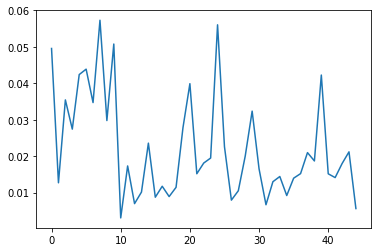

In [253]:
plt.plot(model.feature_importances_)

In [266]:
# xgboost model
model = GradientBoostingClassifier( max_depth = 7 ,n_estimators=85,learning_rate = 0.15,random_state=43)
xgb_model = model.fit(X_train, y_train)
predict_train_xgb = xgb_model.predict(X_train)
predict_test_xgb = xgb_model.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_xgb))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_xgb))

Training Accuracy: 1.0
Validation Accuracy: 0.7016949152542373


In [267]:
list(zip(X_train, model.feature_importances_))

[('int_corr', 0.09694354146666823),
 ('samerace', 0.011993280984169975),
 ('age_o', 0.05994800425998787),
 ('race_o', 0.027515866026236714),
 ('pf_o_att', 0.06515873311761673),
 ('pf_o_sin', 0.05792221392681177),
 ('pf_o_int', 0.049565459895385904),
 ('pf_o_fun', 0.06150609060435874),
 ('pf_o_amb', 0.052587794646043594),
 ('pf_o_sha', 0.048616863133196714),
 ('met_o', 0.002450022236359496),
 ('age', 0.01661383593962953),
 ('race', 0.008980596778975041),
 ('imprace', 0.013229520666776663),
 ('imprelig', 0.011030653814524375),
 ('goal', 0.01575209221759195),
 ('date', 0.00937498756908566),
 ('go_out', 0.009970263884483056),
 ('sports', 0.011151219628300874),
 ('tvsports', 0.015317734325670834),
 ('exercise', 0.031565156754215076),
 ('dining', 0.017320075212895976),
 ('museums', 0.011015790456486485),
 ('art', 0.005186661235717458),
 ('hiking', 0.026147873801864677),
 ('gaming', 0.021094748745373045),
 ('clubbing', 0.011689705466255836),
 ('reading', 0.0062483782216139145),
 ('tv', 0.0119

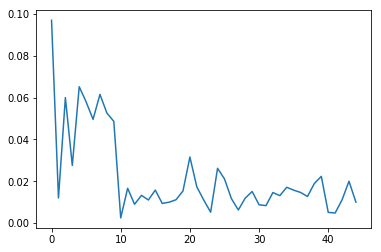

In [268]:
plt.plot(model.feature_importances_)

In [12]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predict_test_rf))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predict_test_rf))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predict_test_rf)))

Mean Absolute Error: 0.2
Mean Squared Error: 0.2
Root Mean Squared Error: 0.4472135954999579


In [13]:
feature_imp = pd.Series(model.feature_importances_).sort_values()
feature_imp

15    0.002127
49    0.004668
54    0.005999
1     0.006955
17    0.007101
22    0.007554
46    0.008100
26    0.008205
45    0.008401
35    0.008475
47    0.008682
32    0.008755
21    0.008829
28    0.009156
20    0.009592
27    0.009892
18    0.010043
31    0.010178
38    0.010223
48    0.010380
36    0.010558
37    0.010690
30    0.011402
39    0.011698
23    0.011831
24    0.012114
19    0.012188
33    0.012229
43    0.012645
41    0.012702
42    0.012964
34    0.013683
44    0.013706
16    0.013889
25    0.014917
3     0.014959
40    0.015292
29    0.017275
52    0.018884
53    0.019607
51    0.019723
50    0.022682
12    0.024214
11    0.025094
8     0.025901
14    0.026965
5     0.029092
2     0.030194
6     0.030370
9     0.030972
4     0.032827
7     0.035274
0     0.036725
13    0.075756
10    0.117664
dtype: float64

In [46]:
list(zip(X_train, model.feature_importances_))

[('int_corr', 0.013038516373506783),
 ('samerace', 0.005527418959859836),
 ('age_o', 0.018106464749513697),
 ('race_o', 0.038169631603944806),
 ('pf_o_att', 0.0239108859568786),
 ('pf_o_sin', 0.03316378603014697),
 ('pf_o_int', 0.06032809683051909),
 ('pf_o_fun', 0.035273697471798336),
 ('pf_o_amb', 0.013901047403855206),
 ('pf_o_sha', 0.03973795446615946),
 ('attr_o', 0.4778767654673608),
 ('sinc_o', 0.005463867705922608),
 ('intel_o', 0.017659101803950635),
 ('fun_o', 0.1385575669938416),
 ('amb_o', 0.0009759125495122544),
 ('met_o', 0.0014254520075930202),
 ('age', 0.0014219358039394175),
 ('race', 0.003636556016022733),
 ('imprace', 0.00012653414249941627),
 ('imprelig', 0.01578010041560593),
 ('goal', 0.0),
 ('date', 0.0),
 ('go_out', 0.0),
 ('sports', 0.0),
 ('tvsports', 0.004852704985247467),
 ('exercise', 0.0),
 ('dining', 0.0),
 ('museums', 0.0),
 ('art', 0.0),
 ('hiking', 0.006769088668341059),
 ('gaming', 0.001618442602161931),
 ('clubbing', 0.0),
 ('reading', 0.004747904630

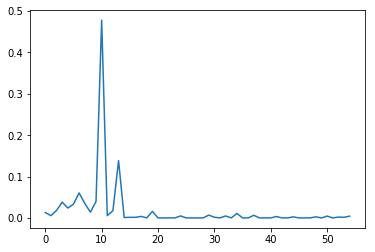

In [47]:
plt.plot(model.feature_importances_)

In [106]:
X=women[['int_corr'  ,  'pf_o_att' ,'pf_o_sin','pf_o_int','pf_o_fun','attr_o','fun_o','like_o','prob_o' ,'attr','sinc','intel','fun']]
y=women['dec_o']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10, stratify=y)

In [101]:
X=women[['like_o','shar_o','attr']]
y=women['dec_o']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=10, stratify=y)

In [ ]:
model = RandomForestClassifier()
rf_model = model.fit(X_train, y_train)
predict_train_rf = rf_model.predict(X_train)
predict_test_rf = rf_model.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_rf))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_rf))

In [96]:
# xgboost model
model = GradientBoostingClassifier( n_estimators=20)
xgb_model = model.fit(X_train, y_train)
predict_train_xgb = xgb_model.predict(X_train)
predict_test_xgb = xgb_model.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_xgb))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_xgb))

Training Accuracy: 0.7491496598639455
Validation Accuracy: 0.6745762711864407
